In [14]:
#Ex 1


names <- c("Loch Ness","Loch Lomond","Loch Morar","Loch Tay","Loch Awe","Loch Maree","Loch Ericht","Loch Lochy","Loch Rannoch","Loch Shiel","Loch Katrine","Loch Arkaig","Loch Shin")
vol <- c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)
area <- c(56,71,27,26.4,39,28.6,18.6,16,19,19.5,12.4,16,22.5)
length <- c(39,36,18.8,23,41,20,23,16,15.7,28,12.9,19.3,27.8)
max_depth <- c(230,190,310,150,94,114,156,162,134,128,151,109,49)
mean_depth <- c(132,37,87,60.6,32,38,57.6,70,51,40,43.4,46.5,15.5)

scottish.lakes <- data.frame("Loch" = names, "Volume"= vol, "Area"= area, "Length"= length, "Max_depth"= max_depth, "Mean_depth"= mean_depth)

Vol_max <- max(scottish.lakes$Volume)
Vol_min <- min(scottish.lakes$Volume)
Area_max <- max(scottish.lakes$Area)
Area_min <- min(scottish.lakes$Area)

scottish.lakes <- scottish.lakes[order(-scottish.lakes$Area),]
Area_2_max <- scottish.lakes$Loch[1:2]

Area_tot <- sum(scottish.lakes$Area)

message("The maximum volume is ", Vol_max, " km^3")
message("The minimum volume is ", Vol_min," km^3")
message("The maximum area is ", Area_max," km^2")
message("The minimum Area is ", Area_min," km^2")

message("The two lakes with maximum Area are ", Area_2_max[1], " and ", Area_2_max[2])
message("The total area convered by lakes is ", Area_tot," km^2")


The maximum volume is 7.45 km^3
The minimum volume is 0.35 km^3
The maximum area is 71 km^2
The minimum Area is 12.4 km^2
The two lakes with maximum Area are Loch Lomond and Loch Ness
The total area convered by lakes is 372 km^2


Loading required package: lattice


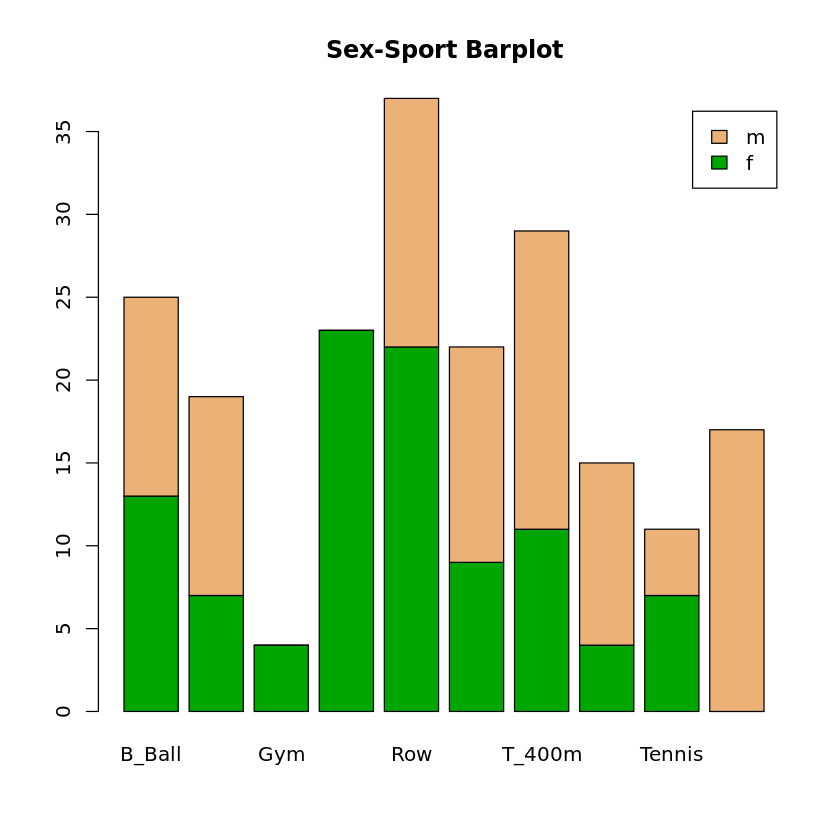

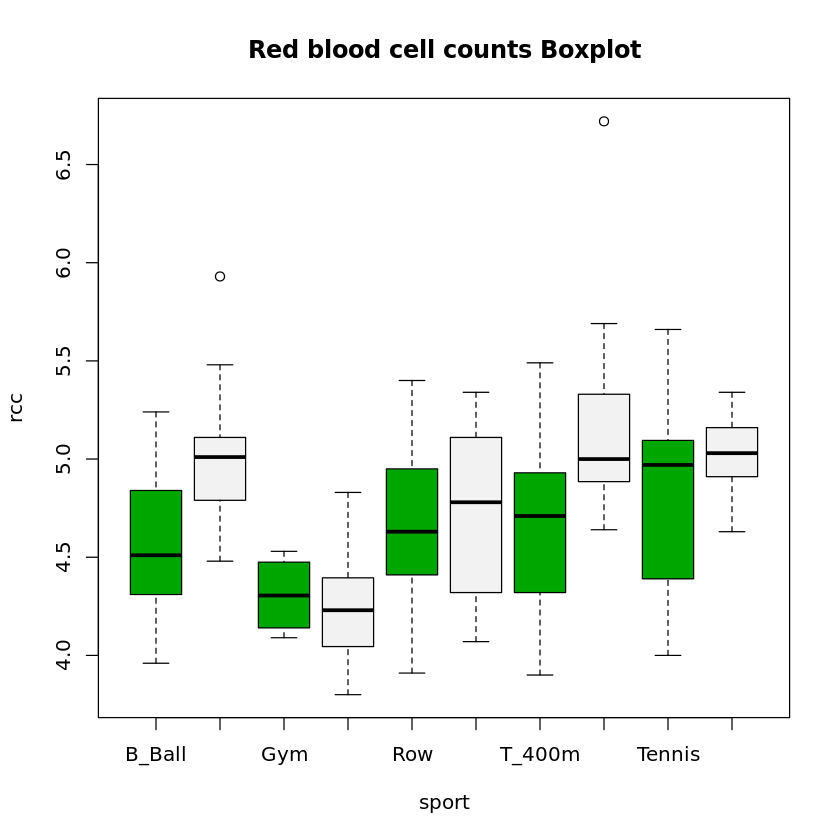

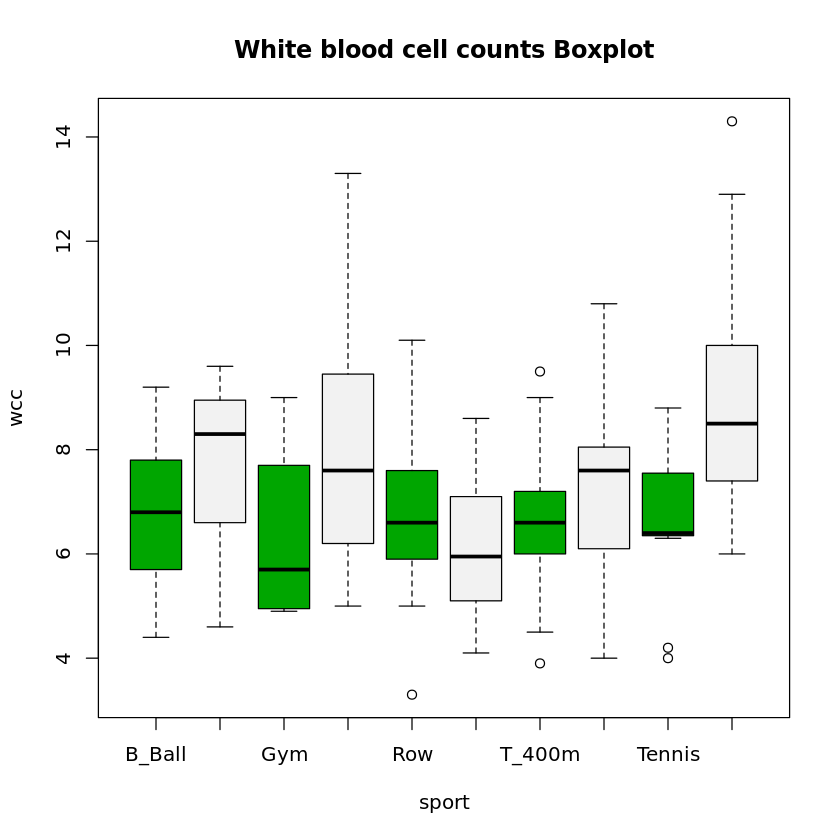

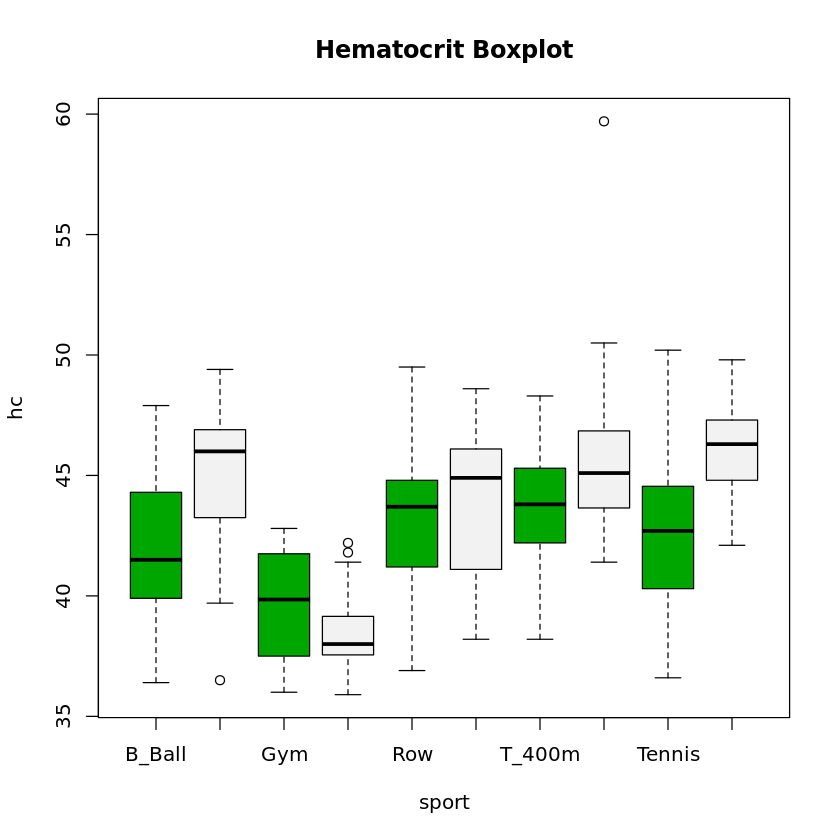

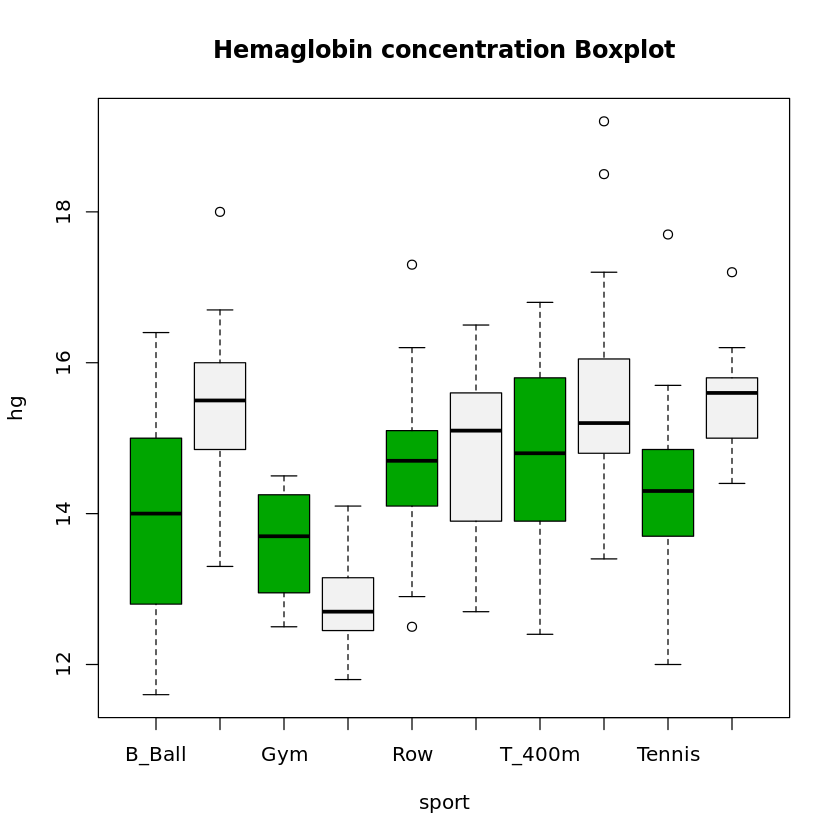

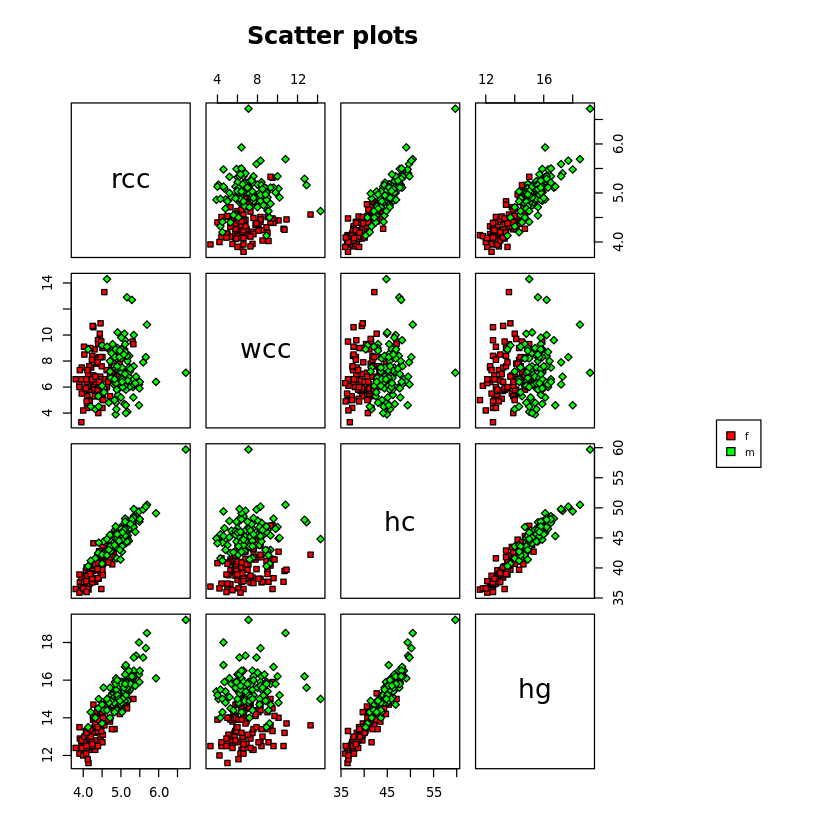

In [2]:
#Ex 2


#install.packages(c('DAAG','tibble'))

library(DAAG)
library(tibble)
#?DAAG::ais
t_ais <- as_tibble(DAAG::ais)



gen_spo <- table(t_ais[["sex"]],t_ais[["sport"]])
barplot(gen_spo,legend = TRUE,col = terrain.colors(3),main = "Sex-Sport Barplot")

check <- apply(is.na(t_ais),2,any)

#dev.new()
box_sport <- c(t_ais["rcc"],t_ais["wcc"],t_ais["hc"],t_ais["hg"],t_ais["sport"],t_ais["sex"])
boxplot(rcc~sport,box_sport,col = terrain.colors(2),main="Red blood cell counts Boxplot")
#dev.new()
boxplot(wcc~sport,box_sport,col = terrain.colors(2),main="White blood cell counts Boxplot")
#dev.new()
boxplot(hc~sport,box_sport,col = terrain.colors(2),main="Hematocrit Boxplot")
#dev.new()
boxplot(hg~sport,box_sport,col = terrain.colors(2),main="Hemaglobin concentration Boxplot")

#dev.new()
pairs(~rcc+wcc+hc+hg, data = t_ais,pch = c(22,23)[unclass(t_ais$sex)],bg=c("red","green")[unclass(t_ais$sex)],main="Scatter plots",oma=c(4,4,6,15))
legend(0.9, 0.5, as.vector(unique(t_ais$sex)),  fill=c("red", "green"),cex=0.5)


target: https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-08.xlsx


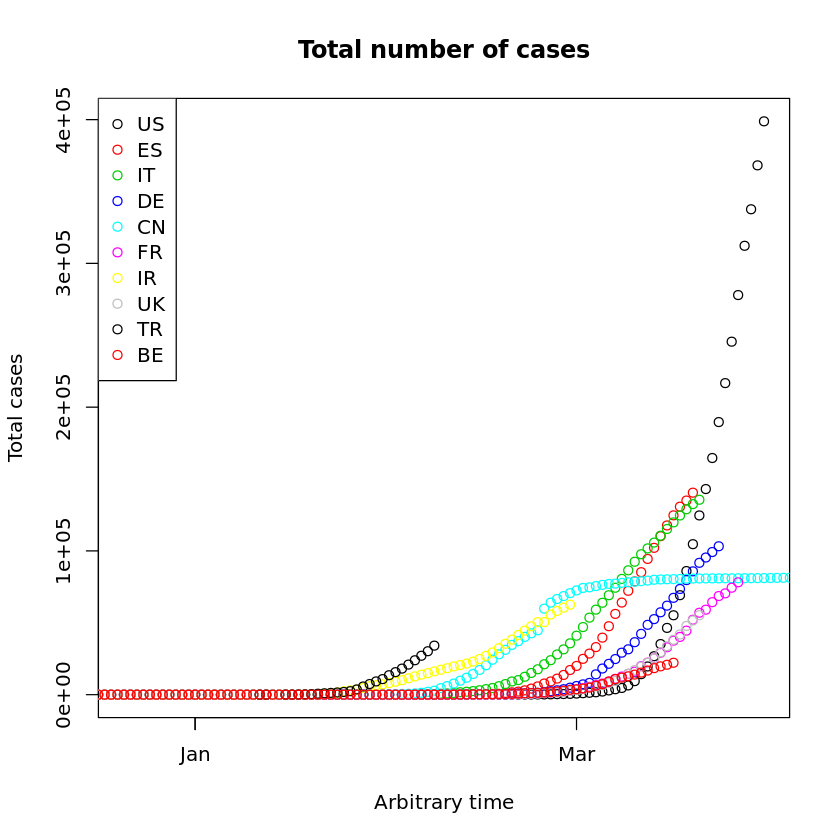

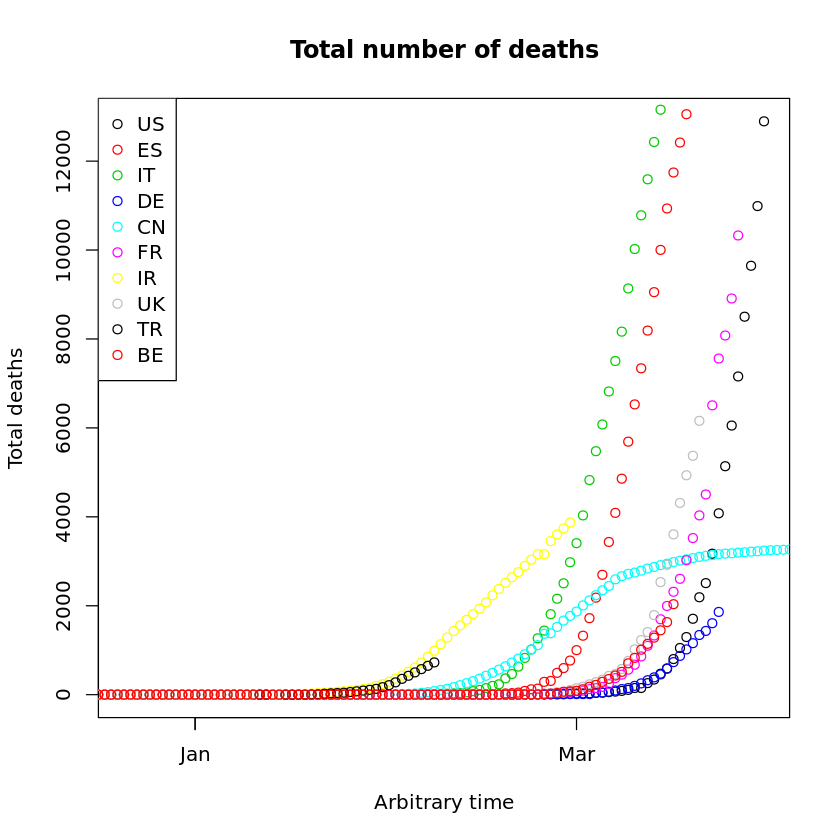

In [28]:
#ex 3


needed_packages  <- c("lubridate" , "readxl", "curl")
already_installed  <- needed_packages %in% installed.packages ()
for (pack in  needed_packages [! already_installed ]) {
	message(paste("To be installed:", pack , sep=" "))
	install.packages(pack)
}

library(lubridate)
library(readxl)
library(curl)

url  <- "https://www.ecdc.europa.eu/sites/default/files/documents/"
fname  <- "COVID-19-geographic-disbtribution-worldwide-"
date  <- lubridate::today()-1
ext = ".xlsx"
target  <- paste(url , fname , date , ext , sep="")
message("target: ", target)
tmp_file  <- tempfile("data", ".", fileext=".xlsx")
tmp  <- curl::curl_download(target  , destfile=tmp_file)

covid  <- readxl::read_xlsx(tmp_file)

last_day <- as_tibble(covid[covid$dateRep == date,])
dead_threshold <- last_day[last_day[["cases"]]>200 | last_day[["deaths"]]>200,]

top <-aggregate(covid$cases,by=list(Category=covid$geoId),FUN = sum)       #find countries with more cases
top <- top[order(-top$x),]
index <-top[1:10,1]

covid <- covid[order(covid$dateRep),]

norm <- vector()
for(m in index){
    for (l in 1:length(covid$dateRep[covid$geoId == m ])){                   #find day with first case for each country
        if (covid$cases[covid$geoId == m ][l] != 0){
            offset <- covid$dateRep[covid$geoId == m ][l]
            break                                                                                        
            }
    }
    norm = c(norm,offset)
}

norm <- norm - 10*3600*24                             #vector to normalize each curve to 10 days before first case

#dev.new()
plot((covid$dateRep[covid$geoId == index[1]]-norm[1]),cumsum(covid$cases[covid$geoId == index[1]]),main = "Total number of cases",xlab="Arbitrary time",ylab="Total cases",col=1)
for (k in 2:10){ points((covid$dateRep[covid$geoId == index[k]]-norm[k]),cumsum(covid$cases[covid$geoId == index[k]]),col=k) }
legend(x="topleft", 0.8,legend=as.vector(index),cex=1,col=c(1:10),pch=1)

#dev.new()
plot((covid$dateRep[covid$geoId == index[1]]-norm[1]),cumsum(covid$deaths[covid$geoId == index[1]]),main = "Total number of deaths",xlab="Arbitrary time",ylab="Total deaths",col=1)
for (k in 2:10){ points((covid$dateRep[covid$geoId == index[k]]-norm[k]),cumsum(covid$deaths[covid$geoId == index[k]]),col=k) }
legend(x="topleft", 0.8,legend=as.vector(index),cex=1,col=c(1:10),pch=1)
